In [33]:
import pandas as pd
import csv
import numpy as np
from ast import literal_eval
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from textblob import TextBlob


In [34]:
from textblob import TextBlob
from textblob.exceptions import TranslatorError



def translate(text_to_translate):
    
    blob = TextBlob(text_to_translate)
    
    # #Translate the text to another language 
    # translated_text = translator.translate(text_to_translate, dest='el')
    try:
        return str(blob.translate(from_lang='el', to='en'))
    except TranslatorError as e:
    # Handle NotTranslated exception
        print(text_to_translate)
        print(f"Translation not possible: {e}")


In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def polarity(text):
    blob = TextBlob(text)
    # Extract sentiment polarity and subjectivity
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment_category = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    return polarity, subjectivity, sentiment_category
    # sentiment_score = sia.polarity_scores(text)
    # dict_items_list = list(sentiment_score.items())
    # return dict_items_list[3][1]



In [36]:
df_final = pd.read_csv('data/df_final_for_Reg.csv')
df_final.head()
len(df_final.iloc[0,2])
df_final['text_embedding'] = df_final['text_embedding'].apply(lambda x: [float(x) for x in x.split(',')])
df_final.shape


(2279, 4)

In [49]:
from collections import Counter


myset = list()
for i in range(len(df_final)):
  
    myset.append(polarity(df_final.iloc[i,1]))

counter_result = Counter(myset)
for value, count in counter_result.items():
    print(f"{value}: {count} occurrences")



(0.0, 0.0, 'Neutral'): 2182 occurrences
(0.0, 1.0, 'Neutral'): 1 occurrences
(0.25, 0.8500000000000001, 'Positive'): 1 occurrences
(-0.5, 1.0, 'Negative'): 3 occurrences
(-0.05, 0.4, 'Negative'): 1 occurrences
(0.2, 0.6, 'Positive'): 1 occurrences
(0.3, 0.5, 'Positive'): 3 occurrences
(0.0, 0.0625, 'Neutral'): 1 occurrences
(0.5, 1.0, 'Positive'): 3 occurrences
(0.13636363636363635, 0.45454545454545453, 'Positive'): 8 occurrences
(0.16666666666666669, 0.5166666666666666, 'Positive'): 1 occurrences
(0.1, 0.4, 'Positive'): 3 occurrences
(0.8, 0.2, 'Positive'): 3 occurrences
(-0.1, 0.3, 'Negative'): 1 occurrences
(-0.025, 0.125, 'Negative'): 1 occurrences
(-0.2916666666666667, 0.5416666666666666, 'Negative'): 1 occurrences
(0.0, 0.1, 'Neutral'): 3 occurrences
(0.03333333333333333, 0.06666666666666667, 'Positive'): 3 occurrences
(-0.4, 0.6, 'Negative'): 1 occurrences
(-0.2, 0.3, 'Negative'): 2 occurrences
(-0.16666666666666666, 0.43333333333333335, 'Negative'): 4 occurrences
(-0.375, 0.5, 

In [48]:
print(len(myset))

55


In [18]:
#create a regression label

df_final['label_r'] = df_final['claim']
df_final['label_r'] = df_final['label_r'].apply(lambda x: polarity(translate(x)))
df_final.head()

,id,claim,text_embedding,label,label_r
0,1,Έχουν ήδη φύγει το δεύτερο εξάμηνο του 2019 απ...,"[0.001223430735990405, -0.016094623133540154, ...",1.0,0.0000
1,2,Το Μεταναστευτικό τώρα αποκτά μία νέα διάσταση...,"[0.00682240491732955, -0.010535278357565403, 0...",0.0,0.0000
2,3,«Μας έκλεισαν μέσα και κυκλοφορούν παντού λαθρ...,"[0.010850735008716583, -0.021955367177724838, ...",0.0,-0.8020
3,4,Μετανάστες στον Έβρο: «[Οι Τούρκοι] Μας έβγαλα...,"[-0.0027062678709626198, -0.03142924979329109,...",0.0,-0.5106
4,5,Έτοιμοι για «απόβαση» στη Λέσβο 150.000 μετανά...,"[0.004963890183717012, 0.009464048780500889, -...",0.0,0.3612


In [22]:
arr = [df_final.iloc[i,2] for i in range(len(df_final))]
# arr = np.array(arr)
arr2 = [i for i in range(len(arr))]
# arr2 = np.array(arr2)


In [23]:
#arr3 = [[tokens, index] for tokens in arr for index in range(len(arr))]
# arr3 = np.column_stack((arr, arr2))
# arr3 = [ [arr[i],arr2[j]] for i in range (len(arr)) for j in range(len(arr)) ]
##USE HSTACK OR NP.COLUMN STACK


In [25]:
#Classification

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB

arr = [df_final.iloc[i,2] for i in range(len(df_final))]
#arr3 = np.array([arr,arr2])



#Splitting dataset in test/train/validation
X_train, X_test, y_train, y_test= train_test_split(arr  , np.array(df_final.iloc[:,4]).astype('float'), test_size=0.2, random_state=42)

Mean Squared Error: 0.4941099984776981


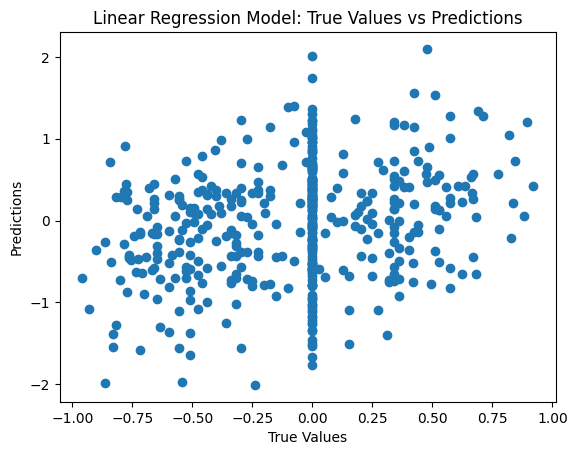

In [26]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot predicted vs true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model: True Values vs Predictions')
plt.show()

Decision Tree Regression Mean Squared Error: 0.24959136585526318


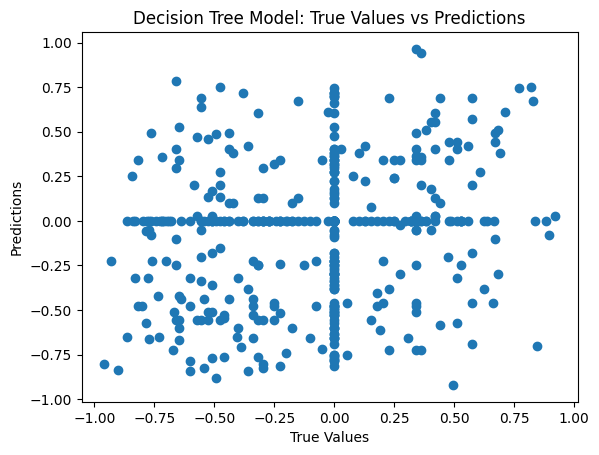

In [27]:
# Create a Decision Tree regression model



tree_model = DecisionTreeRegressor()

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree Regression Mean Squared Error: {mse_tree}')


# Plot the data 
plt.scatter(y_test, y_pred_tree)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Model: True Values vs Predictions')
plt.show()

Random Forest Regression Mean Squared Error: 0.12332852713423903


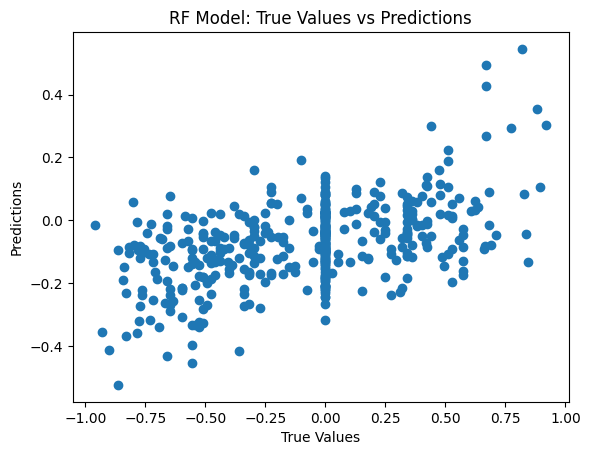

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')

# Plot the data 
plt.scatter(y_test, y_pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RF Model: True Values vs Predictions')
plt.show()

SVM Regression Mean Squared Error: 0.10422542007697382


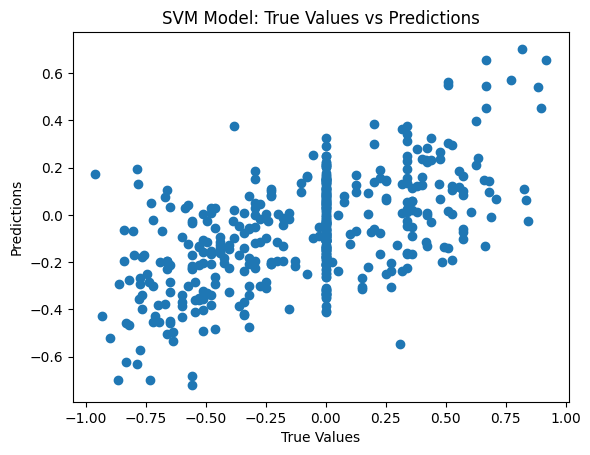

In [29]:
# Create an SVM regression model
svm_model = SVR(kernel='linear')  # You can choose different kernels such as 'linear', 'rbf', etc.

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM Regression Mean Squared Error: {mse_svm}')


# Plot the data 
plt.scatter(y_test, y_pred_svm)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVM Model: True Values vs Predictions')
plt.show()

c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


k-NN Regression Mean Squared Error: 0.12473222019385966


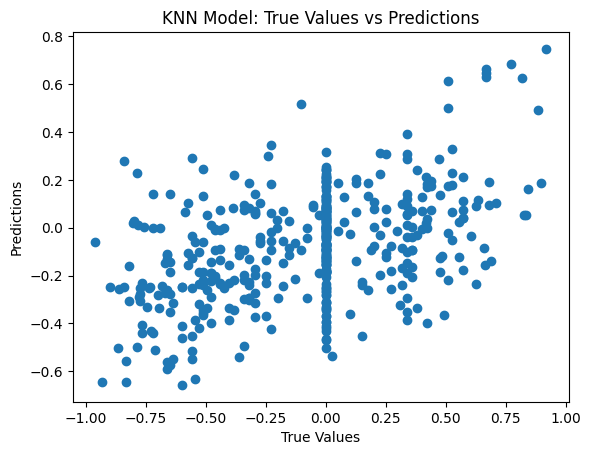

In [30]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'k-NN Regression Mean Squared Error: {mse_knn}')

# Plot the data and the k-NN regression curve
plt.scatter(y_test, y_pred_knn)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN Model: True Values vs Predictions')
plt.show()

In [31]:
df_final.shape

(2279, 5)